# Investment grade and Rating classification

## Introduction

In this notebook we are looking at 26 features corresponding to various financial and accounting metrics of firms in different industries.
Based on the metrics, the firms are categorised as follows:
 - If the assets are of _Investment grade_ or not (0,1)
 - Classified into 16 rating classes
 
## Objective

The aim of the project is to apply Machine Learning classification algorithms to predict the ratings of the firm. We are using 3 algorithms for the same, namely:
1. Linear regression with L1 and L2 regularization
2. Logistic regression with L1 and L2 regularization
3. Neural network


## Steps performed

1. Reading the data
2. Basic data exploration
3. Scaling the numerical values
4. Splitting the data into train and test data
5. Linear regression
    - Lasso regularization (L1)
    - Ridge regularization (L2)
6. Logistic regression
    - Lasso regularization (L1)
    - Ridge regularization (L2)
7. Neural networks - Keras Classifier

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# load the dataset

data = pd.read_csv("MLF_GP1_CreditScore.csv")

## Data Exploration

In [3]:
# display the first few rows

data.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [4]:
# extracting the uniques rating categories 

data.Rating.unique()

array(['A1', 'A2', 'A3', 'Aa2', 'Aa3', 'Aaa', 'B1', 'B2', 'B3', 'Ba1',
       'Ba2', 'Ba3', 'Baa1', 'Baa2', 'Baa3', 'Caa1'], dtype=object)

1    1287
0     413
Name: InvGrd, dtype: int64


<Axes: xlabel='InvGrd', ylabel='count'>

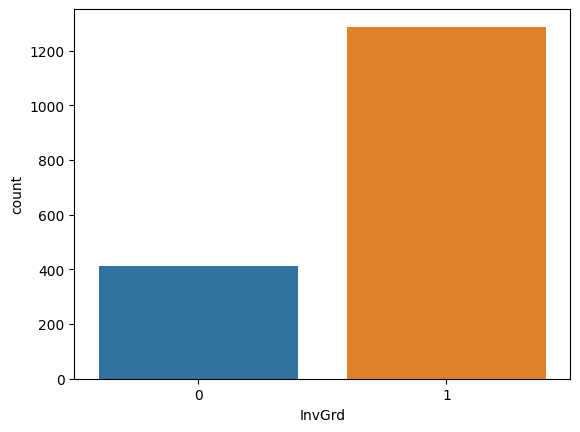

In [5]:
# Seeing the distribution count of firms categorised as investment grade or not

print(data.InvGrd.value_counts())

sb.countplot(data, x="InvGrd")

From the above plot, it is evident that majority of the firms are of investment grade based on the metrics given.

## Data pre-processing

In [6]:
data.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,...,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,...,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,...,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,...,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,...,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,...,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,...,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


From the above table, we can see that the numerical features containing the metrics are of different scales which can tamper with the prediction. In order to equalise the sclaes across all columns, we can use _standardScaler_ which follows $(x-mean)/std$

In [7]:
# create an instance of the StandardScaler class
scaler = StandardScaler()

# apply the scaler instance to only the numerical features of the data
data.iloc[:, :-2] = scaler.fit_transform(data.iloc[:, :-2])

In [8]:
# Again looking at the summary statistics of the data after standardizing
data.iloc[:,:-2].describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE
count,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1700.000000,1700.000000,...,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1700.000000,1.700000e+03,1.700000e+03,1.700000e+03
mean,8.359326e-18,2.089832e-18,8.359326e-18,-1.044916e-17,-2.089832e-18,8.359326e-18,2.089832e-18,8.359326e-18,0.000000,0.000000,...,-4.179663e-18,3.134747e-18,-8.359326e-18,6.269495e-18,3.343731e-17,3.343731e-17,0.000000,8.359326e-18,6.269495e-18,4.179663e-18
std,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294,1.000294,...,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294,1.000294e+00,1.000294e+00,1.000294e+00
min,-4.399379e+00,-2.998778e+00,-3.586138e+00,-4.372273e+00,-1.997888e+01,-1.296026e-01,-1.736898e+01,-1.342001e-01,-0.079669,-0.784101,...,-2.748498e+01,-2.848422e+01,-2.452175e-01,-2.186482e+01,-7.512353e-01,-2.843473e+00,-15.655172,-4.983315e+00,-2.093788e+01,-2.428550e+01
25%,-3.464092e-01,-1.682008e-01,-3.849988e-01,-3.378622e-01,-1.945233e-02,-6.750623e-02,1.053956e-02,-8.322824e-02,-0.066975,-0.355974,...,-7.334130e-03,1.308591e-02,-7.519002e-02,-5.666804e-05,-3.484377e-01,-5.463219e-01,-0.030095,-6.539629e-02,-1.561884e-02,-1.062865e-03
50%,-1.011850e-01,-8.259076e-02,-8.106612e-02,-5.260293e-02,-4.588259e-03,-6.133175e-02,1.468599e-02,-7.751366e-02,-0.059643,-0.210227,...,2.835281e-02,4.169746e-02,-4.855279e-02,2.733913e-02,-2.077803e-01,-1.164363e-01,0.005501,-4.447582e-02,-1.973767e-03,1.281891e-02
75%,2.015715e-01,-1.504616e-03,2.352123e-01,2.089841e-01,6.854414e-03,-5.152467e-02,2.044098e-02,-6.661251e-02,-0.047975,0.008872,...,6.645897e-02,7.159862e-02,-2.307200e-02,5.970704e-02,-1.047139e-02,3.318900e-01,0.033145,-2.717660e-02,9.372346e-03,2.724821e-02
max,1.375771e+01,1.160705e+01,1.463877e+01,2.180301e+01,3.304145e+01,2.109055e+01,3.050371e+01,1.776441e+01,39.153511,19.641992,...,2.547388e+00,2.328410e+00,3.454446e+01,1.225973e+01,1.782637e+01,1.547182e+01,30.400358,3.146933e+01,3.254496e+01,2.231880e+01


It can be seen that all the columns have been scaled to almost equal scales.

By calculating the correlation between all independent metrics, we can find if any two or more features are inter correlated. If so, one of those columns can be dropped in order to prevent over-fitting the training model.
The correlation matrix below shows the following: <br>
_Total debt_ ~ _Total debt/EBITDA_, _Total debt_ ~ _Total debt/MV_, _Net income before extras_ ~ _ROA_, _Net debt_ ~ _Net debt/MV_, _cash_ ~ _Current liquidity_, _Total debt/EBITDA_ ~ _Total debt/MV_, _CFO_ ~ _CFO debt_

<Axes: >

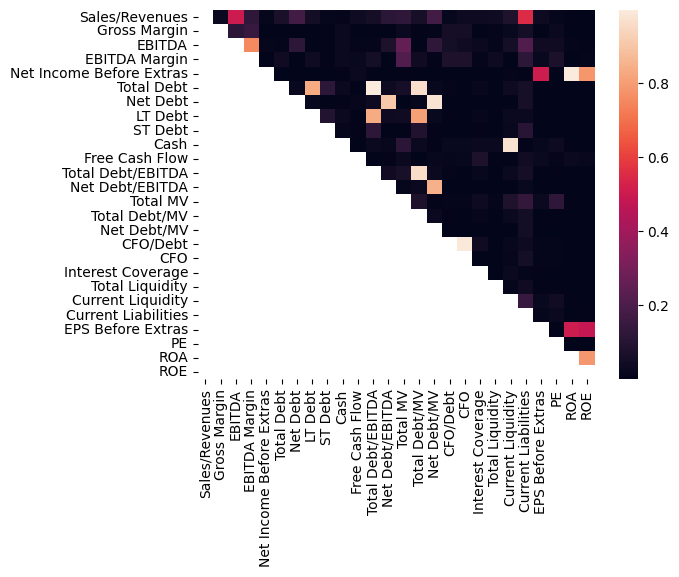

In [9]:
# finding the correlation between all the features

corr_mat = data.iloc[:,:-2].corr().abs()
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
sb.heatmap(upper, xticklabels=upper.columns, yticklabels=upper.columns)

Looking at the correlation matrix for the features with a high correlation i.e. >0.95, one of the 2 columns are dropped from the data.

In [10]:
# dopping the correlated columns from the data

to_drop = ['Total Debt/EBITDA', 'Total Debt/MV', 'Net Debt/MV', 'Net Debt/EBITDA',
           'CFO/Debt', 'Cash', 'Net Income Before Extras']
data.drop(to_drop, axis=1, inplace=True)

After dropping the columns, we have data with 1700 rows and 21 columns of which the last 2 are classification features while the rest are the non-correlated numeric metrics.

Using the **LabelEncoder** method, we are converting the 2 classification variables (dependent variables) which are of *String* type to integers.<br>
*Label encoder* assigns a unique integer value to every group present in the column alphabetically.

In [11]:
# Converting the 2 classification features to categorical column

encoder = LabelEncoder()

data['InvGrd'] = encoder.fit_transform(data['InvGrd'])
data['Rating'] = encoder.fit_transform(data['Rating'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sales/Revenues       1700 non-null   float64
 1   Gross Margin         1700 non-null   float64
 2   EBITDA               1700 non-null   float64
 3   EBITDA Margin        1700 non-null   float64
 4   Total Debt           1700 non-null   float64
 5   Net Debt             1700 non-null   float64
 6   LT Debt              1700 non-null   float64
 7   ST Debt              1700 non-null   float64
 8   Free Cash Flow       1700 non-null   float64
 9   Total MV             1700 non-null   float64
 10  CFO                  1700 non-null   float64
 11  Interest Coverage    1700 non-null   float64
 12  Total Liquidity      1700 non-null   float64
 13  Current Liquidity    1700 non-null   float64
 14  Current Liabilities  1700 non-null   float64
 15  EPS Before Extras    1700 non-null   f

## Splitting data into train/test set

We identify the dependent variable (y) and the set of independent variables (X) to train and test our ML models.<br> 
For **Linear and Logistic regression**, $y =$ {Investment grade} i.e. the objective is to classify the firms as investment grade(1) or not (0) and $X =$ {all numeric features of data (0, 18)}.

In [12]:
# identify the dependent and independent variables. assign them to y and X respectively.

independent_vars = data.columns[0:19] # first 18 columns as independent features
dependent_var = data.columns[-2] # second last column as dependent variable

X = data[independent_vars].values
y = data[dependent_var].values

To further split the data into train/test, we use **StratifiedKFold** from the *scikit_learn* library.<br>
*Stratified K fold cross validator* creates test sets such that each test set has euqal proportion of the classification class. With the number given to *n_splits* parameter, the cross validation is performed that many times to generate train/test sets.

In [13]:
# import model from sklearn
from sklearn.model_selection import StratifiedKFold

# create instance of the model with the required parameters
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# iterate through the results from cross validator and assign train/test data for X and y
for train_index, test_index in stratified_kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

## Linear Regression

The **LinearRegression** method formulates a linear equation with how many independent variables we are passing and identifies coefficients for all the features in {X} and the intercept value to form the linear equation for prediction.<br>

Linear regression gives equal weightage to all the independent features used to predict. Sometimes this may cause over-fitting and tamper with the predictions thereby having less accuracy and high mean squared error.

In [14]:
# create an instance of the linearRegression model
linear_regression = LinearRegression()

# fit the linear equation to the training data
linear_regression.fit(X_train, y_train)

# run the model against test data to predict the dependent variable
y_pred = linear_regression.predict(X_test)

# get the MSE and accuracy of the run model
print(f"Mean squared error of linear regression: {round((mean_squared_error(y_test, y_pred))*100,3)}%")

print(f"Accuracy score of linear regression: {round((accuracy_score(y_test, np.round(y_pred)))*100, 3)}%")

Mean squared error of linear regression: 19.956%
Accuracy score of linear regression: 75.882%


### Lasso Regularization (L1)

L1 regularizer follows a shrinkage technique which attempts to bring all the features towards the mean by assigning a penalty term ($\alpha$) to the magnitude of the variable.
This technique helps prevents taking into account variables which have multi-collinearity thereby reducing the complexity of the model.<br>

For our data, we take the value of $\alpha=0.00005$ fits the model well and gives the maximum accuracy and minimum MSE.<br>
It can be seen that Lasso did better than the normal linear regression model.

In [15]:
# create an instance of the Lasso method with alpha parameter set to an optimal value and fit the model to the training data
lasso_reg = Lasso(alpha=0.00005).fit(X_train, y_train)

# run the trained model against test data to predict the dependent variable
y_pred_ls = lasso_reg.predict(X_test)

# get the MSE and accuracy of the run model
print(f"Mean squared error of lasso linear regression: {round((mean_squared_error(y_test, y_pred_ls))*100,3)}%")

print(f"Accuracy score of lasso linear regression: {round((accuracy_score(y_test, np.round(y_pred_ls)))*100, 3)}%")

Mean squared error of lasso linear regression: 19.925%
Accuracy score of lasso linear regression: 76.176%


### Ridge Regularization (L2)

L2 regularizer works the similar way as L1 with the difference of adding the penalty factor ($\lambda$) to the square of the variables.

For our data, $\lambda=300$ gives a good fit of the linear equation and produces optimal accuracy and minimum MSE for predicting y.<br>
Comparing all 3 models, it is evident that **Ridge** did better than the two.

In [16]:
# create an instance of the Ridge method with alpha parameter set to an optimal value
ridge_reg = Ridge(alpha=300)

# fit the model to the training data
ridge_reg.fit(X_train, y_train)

# run the trained model against test data to predict the dependent variable
ridge_y_pred = ridge_reg.predict(X_test)

# get the MSE and accuracy of the run model
print(f"Mean squared error of ridge linear regression: {round((mean_squared_error(y_test, ridge_y_pred))*100,3)}%")

print(f"Accuracy score of ridge linear regression: {round((accuracy_score(y_test, np.round(ridge_y_pred)))*100, 3)}%")

Mean squared error of ridge linear regression: 18.086%
Accuracy score of ridge linear regression: 76.471%


## Logistic Regression

It is a supervised classification algorithm that calculates the probability of an event occuring based on the independent variables provided. The resulting target variable will have discrete binary output (0/1). Logisitic regression does not give the output as exactly 0 or 1 rather it would be a value between 0 and 1. If we sum the predicted values acrossa single row it should be equal to 1 (probabilities of all input varaiables = 1)

In [17]:
# create an instance of the LogisticRegression method specifying the 
# solver as 'liblinear' used for L1 and L2 regularizers and small datasets and penalty as 'l2' for Ridge.
logistic_reg = LogisticRegression(solver="liblinear", penalty="l2")

# fit the model to the training data
logistic_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [18]:
# run the trained model against the test data
logistic_ridge_y_pred = logistic_reg.predict(X_test)

# get the accuracy of the prediction and the matrix of correctly predicted values by the model
print(f"Accuracy: {round((accuracy_score(y_test, np.round(logistic_ridge_y_pred)))*100, 3)}%")
print(f"Confusion matrix: \n{confusion_matrix(y_test, logistic_ridge_y_pred)}")

Accuracy: 75.882%
Confusion matrix: 
[[  7  76]
 [  6 251]]


In [19]:
# # create an instance of the LogisticRegression method specifying the 
# solver as 'liblinear' used for L1 and L2 regularizers and small datasets and penalty as 'l1' for Lasso.
logistic_reg_lasso = LogisticRegression(solver="liblinear", penalty="l1")

# fit the model to the training data
logistic_reg_lasso.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [20]:
# run the trained model against the test data
logis_lasso_y_pred = logistic_reg_lasso.predict(X_test)

# get the accuracy of the prediction and the matrix of correctly predicted values by the model
print(f"Accuracy: {round((accuracy_score(y_test, np.round(logis_lasso_y_pred)))*100, 3)}%")
print(f"Confusion matrix: \n{confusion_matrix(y_test, logis_lasso_y_pred)}")

Accuracy: 75.882%
Confusion matrix: 
[[  7  76]
 [  6 251]]


From the above code, it is seen that both regularization techniques (L1 and L2) predicted the same and have the same accuracy. We can infer that both the techniques assigned almost equal penalty values to the dependent variables.

## Classification using Neural Networks

In this section, we are using the **keras API** to perform binary and multi-class classification.

In [21]:
# import rrequired libraries from keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

#### To create a classification model

1. Initialise the *Sequential()* class which stacks all the linear layers provided to the model in the order given to it.
2. Define the number of layers the nueral network will have using the *Dense* method which takes the following parameters:
    - units: Number of neurons in that layer
    - input_dim: If defining the input layer, then the number of independent variables being fed to the model
    - activation: The function used by the model at every layer to learn the patterns in the data and gives the output to the next neuron in line
3. Add a *Dropout* layer to prevent over-fitting after every Dense layer is added. it randomly removes some neurons before the output goes to the next layer. This can only be added to non-output layers.
4. Define the output layer - The *first arguement* is the **number of classes** to predict followed by the activation function **sigmoid** for *binary classification* and **softmax** for *mutli-class classification*.

#### Compile the created model

While compiling the model, we need to provide the following:
- **optimizer**: improves the learning rate of the network
- **loss**: the function to compute the loss between actual and predicted values
- **metrics**: to evaluate the performance of the model in predicting the dependent variable

#### Train the model

To fit the model for training data, we provide the train set for X and y with additional parameters:
- **batch_size**: number of samples from the train set the model takes at a time to learn
- **epochs**: the number of iterations to improve learning

### Binary Classification

In [22]:
# create an object of the sequential class
nn_model = Sequential()

# define the layers of the neural network
nn_model.add(Dense(128, input_dim=19, activation="relu")) # input layer
nn_model.add(Dropout(0.5)) # the rate of neurons to be dropped before moving to the next layer
nn_model.add(Dense(64, activation="relu")) # 2nd layer
nn_model.add(Dropout(0.5))
nn_model.add(Dense(32, activation="relu")) # 3rd layer
nn_model.add(Dropout(0.5))
nn_model.add(Dense(1, activation="sigmoid")) # output layer: with 2 classes to predict

# compile the defined model with an optimizer to improve learning, loss function to compute the (actual-predicted)
# and metric to evaluate the model
nn_model.compile(optimizer=Adam(0.001), loss="binary_crossentropy", metrics=['accuracy'])

# fit the model to the training data
classifier = nn_model.fit(X_train, y_train, batch_size=100, epochs=300)

# get the accuracy of the last epoch of the model
print(f"Accuracy of training model: {round(np.max(classifier.history['accuracy'])*100,2)}%")

Epoch 1/300
14/14 [==============================] - 1s 5ms/step - loss: 0.7376 - accuracy: 0.5478
Epoch 2/300
14/14 [==============================] - 0s 5ms/step - loss: 0.7284 - accuracy: 0.6838
Epoch 3/300
14/14 [==============================] - 0s 5ms/step - loss: 0.6770 - accuracy: 0.7265
Epoch 4/300
14/14 [==============================] - 0s 5ms/step - loss: 0.6844 - accuracy: 0.7301
Epoch 5/300
14/14 [==============================] - 0s 4ms/step - loss: 0.6336 - accuracy: 0.7375
Epoch 6/300
14/14 [==============================] - 0s 4ms/step - loss: 0.6114 - accuracy: 0.7596
Epoch 7/300
14/14 [==============================] - 0s 4ms/step - loss: 0.5938 - accuracy: 0.7551
Epoch 8/300
14/14 [==============================] - 0s 4ms/step - loss: 0.5985 - accuracy: 0.7485
Epoch 9/300
14/14 [==============================] - 0s 4ms/step - loss: 0.5858 - accuracy: 0.7596
Epoch 10/300
14/14 [==============================] - 0s 5ms/step - loss: 0.5630 - accuracy: 0.7721
Epoch 11/

14/14 [==============================] - 0s 5ms/step - loss: 0.4558 - accuracy: 0.7809
Epoch 84/300
14/14 [==============================] - 0s 5ms/step - loss: 0.4499 - accuracy: 0.7846
Epoch 85/300
14/14 [==============================] - 0s 5ms/step - loss: 0.4659 - accuracy: 0.7779
Epoch 86/300
14/14 [==============================] - 0s 6ms/step - loss: 0.4550 - accuracy: 0.7743
Epoch 87/300
14/14 [==============================] - 0s 6ms/step - loss: 0.4517 - accuracy: 0.7824
Epoch 88/300
14/14 [==============================] - 0s 8ms/step - loss: 0.4557 - accuracy: 0.7890
Epoch 89/300
14/14 [==============================] - 0s 5ms/step - loss: 0.4569 - accuracy: 0.7765
Epoch 90/300
14/14 [==============================] - 0s 4ms/step - loss: 0.4574 - accuracy: 0.7831
Epoch 91/300
14/14 [==============================] - 0s 4ms/step - loss: 0.4571 - accuracy: 0.7772
Epoch 92/300
14/14 [==============================] - 0s 4ms/step - loss: 0.4481 - accuracy: 0.7757
Epoch 93/300


14/14 [==============================] - 0s 5ms/step - loss: 0.4127 - accuracy: 0.8074
Epoch 165/300
14/14 [==============================] - 0s 5ms/step - loss: 0.4190 - accuracy: 0.8103
Epoch 166/300
14/14 [==============================] - 0s 5ms/step - loss: 0.4114 - accuracy: 0.8044
Epoch 167/300
14/14 [==============================] - 0s 5ms/step - loss: 0.4094 - accuracy: 0.8081
Epoch 168/300
14/14 [==============================] - 0s 5ms/step - loss: 0.4122 - accuracy: 0.8051
Epoch 169/300
14/14 [==============================] - 0s 5ms/step - loss: 0.4127 - accuracy: 0.7978
Epoch 170/300
14/14 [==============================] - 0s 5ms/step - loss: 0.4213 - accuracy: 0.7971
Epoch 171/300
14/14 [==============================] - 0s 5ms/step - loss: 0.4023 - accuracy: 0.8044
Epoch 172/300
14/14 [==============================] - 0s 5ms/step - loss: 0.4008 - accuracy: 0.8206
Epoch 173/300
14/14 [==============================] - 0s 5ms/step - loss: 0.4117 - accuracy: 0.8162
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.3703 - accuracy: 0.8316
Epoch 246/300
14/14 [==============================] - 0s 4ms/step - loss: 0.3689 - accuracy: 0.8279
Epoch 247/300
14/14 [==============================] - 0s 5ms/step - loss: 0.3455 - accuracy: 0.8397
Epoch 248/300
14/14 [==============================] - 0s 5ms/step - loss: 0.3694 - accuracy: 0.8375
Epoch 249/300
14/14 [==============================] - 0s 5ms/step - loss: 0.3654 - accuracy: 0.8228
Epoch 250/300
14/14 [==============================] - 0s 4ms/step - loss: 0.3731 - accuracy: 0.8243
Epoch 251/300
14/14 [==============================] - 0s 5ms/step - loss: 0.3620 - accuracy: 0.8331
Epoch 252/300
14/14 [==============================] - 0s 4ms/step - loss: 0.3594 - accuracy: 0.8404
Epoch 253/300
14/14 [==============================] - 0s 4ms/step - loss: 0.3603 - accuracy: 0.8419
Epoch 254/300
14/14 [==============================] - 0s 4ms/step - loss: 0.3648 - accuracy: 0.8316
Epoc

The model trained with a high accuracy which can mean that the number of neurons provided at each level was complex enough for the model to learn the data better and the activation functions optimized the learning of the model at every epoch.

In [23]:
# Run the trained model against test data to predict the classes
nn_result = nn_model.predict(X_test).round()

# print the accuracy rate on test data
print(f"Accuracy of predicting test data: {round((nn_model.evaluate(X_test, y_test)[1])*100, 2)}%")

11/11 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.8118
Accuracy of predicting test data: 81.18%


#### Analysis of the result

The training and test accuracy are close enough which means the model was trained without any over-fitting and is able to predict the output of the test sample as close as possible to the training sample.

### Multi-class classification

#### Train/test data split

In [24]:
from keras.utils import np_utils

# define the dependent and independent variables
independent_vars = data.columns[0:19] # first 18 columns as independent features
dependent_var = data.columns[-1] # last column as dependent variable

# get the values of the dependent and independent columns
X = data[independent_vars].values
y = data[dependent_var].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

# converting the independent variable to categorical type to feed to the model
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#### Define and compile the classifier model

In [25]:
# get the unique number of classes to be predicted in y
target_classes = len(data[dependent_var].unique())

# create an object of the sequential class
rating_model = Sequential()

# define the layers of the neural network
rating_model.add(Dense(128, input_dim=19, activation="relu")) # input layer
rating_model.add(Dropout(0.5)) # the rate of neurons to be dropped before moving to the next layer
rating_model.add(Dense(64, activation="relu")) # 2nd layer
rating_model.add(Dropout(0.5))
rating_model.add(Dense(64, activation="relu")) # 3rd layer
rating_model.add(Dropout(0.5))
rating_model.add(Dense(target_classes, activation="softmax")) # output layer: with 16 classes to predict

# compile the defined model with an optimizer to improve learning, loss function to compute the (actual-predicted)
# and metric to evaluate the model
rating_model.compile(optimizer=Adam(0.001), loss="categorical_crossentropy", metrics=['accuracy'])

In [26]:
# fit the model to the training data
mc_classifier = rating_model.fit(X_train, 
                              y_train,
                              batch_size=100, 
                              epochs=3000)

# get the accuracy of the last epoch of the model
print(f"Accuracy of training model: {round((np.max(mc_classifier.history['accuracy']))*100,2)}%")

Epoch 1/3000
14/14 [==============================] - 1s 5ms/step - loss: 2.8262 - accuracy: 0.0890
Epoch 2/3000
14/14 [==============================] - 0s 4ms/step - loss: 2.7482 - accuracy: 0.1449
Epoch 3/3000
14/14 [==============================] - 0s 4ms/step - loss: 2.6863 - accuracy: 0.1559
Epoch 4/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.6832 - accuracy: 0.1647
Epoch 5/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.6393 - accuracy: 0.1625
Epoch 6/3000
14/14 [==============================] - 0s 4ms/step - loss: 2.5930 - accuracy: 0.1706
Epoch 7/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.5670 - accuracy: 0.1676
Epoch 8/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.5479 - accuracy: 0.1640
Epoch 9/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.5804 - accuracy: 0.1647
Epoch 10/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.5068 - accuracy: 0.1838

14/14 [==============================] - 0s 5ms/step - loss: 2.1939 - accuracy: 0.2559
Epoch 83/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.2045 - accuracy: 0.2537
Epoch 84/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.1817 - accuracy: 0.2809
Epoch 85/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.1953 - accuracy: 0.2529
Epoch 86/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.1920 - accuracy: 0.2625
Epoch 87/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.1750 - accuracy: 0.2559
Epoch 88/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.1927 - accuracy: 0.2507
Epoch 89/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.1868 - accuracy: 0.2676
Epoch 90/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.1986 - accuracy: 0.2618
Epoch 91/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.1921 - accuracy: 0.2500
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 2.0559 - accuracy: 0.3066
Epoch 163/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.0520 - accuracy: 0.2963
Epoch 164/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.0585 - accuracy: 0.2926
Epoch 165/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.0680 - accuracy: 0.2971
Epoch 166/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.0711 - accuracy: 0.2956
Epoch 167/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.0537 - accuracy: 0.3059
Epoch 168/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.0419 - accuracy: 0.2971
Epoch 169/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.0581 - accuracy: 0.2993
Epoch 170/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.0374 - accuracy: 0.3051
Epoch 171/3000
14/14 [==============================] - 0s 5ms/step - loss: 2.0276 - accuracy: 0.

14/14 [==============================] - 0s 5ms/step - loss: 1.9662 - accuracy: 0.3265
Epoch 243/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.9492 - accuracy: 0.3449
Epoch 244/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.9643 - accuracy: 0.3390
Epoch 245/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.9183 - accuracy: 0.3478
Epoch 246/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.9575 - accuracy: 0.3368
Epoch 247/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.9266 - accuracy: 0.3463
Epoch 248/3000
14/14 [==============================] - 0s 8ms/step - loss: 1.9535 - accuracy: 0.3265
Epoch 249/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.9264 - accuracy: 0.3463
Epoch 250/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.9470 - accuracy: 0.3346
Epoch 251/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.9334 - accuracy: 0.

14/14 [==============================] - 0s 5ms/step - loss: 1.9022 - accuracy: 0.3507
Epoch 323/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.8929 - accuracy: 0.3544
Epoch 324/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.9069 - accuracy: 0.3500
Epoch 325/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.8737 - accuracy: 0.3669
Epoch 326/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.9045 - accuracy: 0.3397
Epoch 327/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.8880 - accuracy: 0.3537
Epoch 328/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.8696 - accuracy: 0.3647
Epoch 329/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.9068 - accuracy: 0.3559
Epoch 330/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.8900 - accuracy: 0.3500
Epoch 331/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.9176 - accuracy: 0.

14/14 [==============================] - 0s 4ms/step - loss: 1.7930 - accuracy: 0.3809
Epoch 403/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.8012 - accuracy: 0.3985
Epoch 404/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.8443 - accuracy: 0.3647
Epoch 405/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.8397 - accuracy: 0.3890
Epoch 406/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.8289 - accuracy: 0.3897
Epoch 407/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.8298 - accuracy: 0.3750
Epoch 408/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.8365 - accuracy: 0.3551
Epoch 409/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.8297 - accuracy: 0.3904
Epoch 410/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.8199 - accuracy: 0.3868
Epoch 411/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.8084 - accuracy: 0.

14/14 [==============================] - 0s 5ms/step - loss: 1.7699 - accuracy: 0.4059
Epoch 483/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.7657 - accuracy: 0.3868
Epoch 484/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.7776 - accuracy: 0.3838
Epoch 485/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.7787 - accuracy: 0.3941
Epoch 486/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7941 - accuracy: 0.3772
Epoch 487/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7635 - accuracy: 0.3890
Epoch 488/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.8058 - accuracy: 0.3743
Epoch 489/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.7873 - accuracy: 0.3978
Epoch 490/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.7825 - accuracy: 0.3985
Epoch 491/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7904 - accuracy: 0.

14/14 [==============================] - 0s 5ms/step - loss: 1.7251 - accuracy: 0.3971
Epoch 563/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7032 - accuracy: 0.4287
Epoch 564/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7450 - accuracy: 0.4037
Epoch 565/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7447 - accuracy: 0.4125
Epoch 566/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7362 - accuracy: 0.4096
Epoch 567/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7356 - accuracy: 0.4044
Epoch 568/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7639 - accuracy: 0.4015
Epoch 569/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7474 - accuracy: 0.4029
Epoch 570/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7324 - accuracy: 0.4118
Epoch 571/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7460 - accuracy: 0.

14/14 [==============================] - 0s 5ms/step - loss: 1.6822 - accuracy: 0.4324
Epoch 643/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7031 - accuracy: 0.4132
Epoch 644/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7176 - accuracy: 0.4287
Epoch 645/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6841 - accuracy: 0.4206
Epoch 646/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6953 - accuracy: 0.4125
Epoch 647/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7274 - accuracy: 0.4294
Epoch 648/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7320 - accuracy: 0.4346
Epoch 649/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7278 - accuracy: 0.4110
Epoch 650/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7028 - accuracy: 0.4154
Epoch 651/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7374 - accuracy: 0.

14/14 [==============================] - 0s 5ms/step - loss: 1.6903 - accuracy: 0.4235
Epoch 723/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7058 - accuracy: 0.4088
Epoch 724/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.7005 - accuracy: 0.4169
Epoch 725/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.6972 - accuracy: 0.4485
Epoch 726/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.6902 - accuracy: 0.4250
Epoch 727/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6782 - accuracy: 0.4346
Epoch 728/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6559 - accuracy: 0.4441
Epoch 729/3000
14/14 [==============================] - 0s 8ms/step - loss: 1.6581 - accuracy: 0.4382
Epoch 730/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.6984 - accuracy: 0.4272
Epoch 731/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6567 - accuracy: 0.

14/14 [==============================] - 0s 5ms/step - loss: 1.6845 - accuracy: 0.4404
Epoch 803/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.7015 - accuracy: 0.4287
Epoch 804/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6874 - accuracy: 0.4309
Epoch 805/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6577 - accuracy: 0.4456
Epoch 806/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6861 - accuracy: 0.4110
Epoch 807/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6303 - accuracy: 0.4294
Epoch 808/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6813 - accuracy: 0.4162
Epoch 809/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6712 - accuracy: 0.4375
Epoch 810/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6619 - accuracy: 0.4551
Epoch 811/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6540 - accuracy: 0.

14/14 [==============================] - 0s 5ms/step - loss: 1.6561 - accuracy: 0.4272
Epoch 883/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6236 - accuracy: 0.4625
Epoch 884/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.6163 - accuracy: 0.4551
Epoch 885/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6568 - accuracy: 0.4485
Epoch 886/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6486 - accuracy: 0.4360
Epoch 887/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6778 - accuracy: 0.4294
Epoch 888/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.6667 - accuracy: 0.4537
Epoch 889/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6479 - accuracy: 0.4441
Epoch 890/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6560 - accuracy: 0.4375
Epoch 891/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6605 - accuracy: 0.

14/14 [==============================] - 0s 5ms/step - loss: 1.6378 - accuracy: 0.4426
Epoch 963/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.6604 - accuracy: 0.4529
Epoch 964/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6263 - accuracy: 0.4456
Epoch 965/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.6076 - accuracy: 0.4507
Epoch 966/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.6666 - accuracy: 0.4360
Epoch 967/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6052 - accuracy: 0.4699
Epoch 968/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.6090 - accuracy: 0.4735
Epoch 969/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.6203 - accuracy: 0.4596
Epoch 970/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6284 - accuracy: 0.4419
Epoch 971/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6252 - accuracy: 0.

14/14 [==============================] - 0s 5ms/step - loss: 1.5853 - accuracy: 0.4522
Epoch 1043/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6657 - accuracy: 0.4449
Epoch 1044/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6292 - accuracy: 0.4382
Epoch 1045/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5951 - accuracy: 0.4640
Epoch 1046/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.6364 - accuracy: 0.4456
Epoch 1047/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5941 - accuracy: 0.4610
Epoch 1048/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6039 - accuracy: 0.4551
Epoch 1049/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5975 - accuracy: 0.4566
Epoch 1050/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6257 - accuracy: 0.4684
Epoch 1051/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6299 - acc

14/14 [==============================] - 0s 5ms/step - loss: 1.6202 - accuracy: 0.4537
Epoch 1122/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5829 - accuracy: 0.4662
Epoch 1123/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6457 - accuracy: 0.4493
Epoch 1124/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6350 - accuracy: 0.4478
Epoch 1125/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6223 - accuracy: 0.4706
Epoch 1126/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6222 - accuracy: 0.4419
Epoch 1127/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.6076 - accuracy: 0.4632
Epoch 1128/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5641 - accuracy: 0.4625
Epoch 1129/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6179 - accuracy: 0.4691
Epoch 1130/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5765 - acc

14/14 [==============================] - 0s 4ms/step - loss: 1.5932 - accuracy: 0.4515
Epoch 1201/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.5883 - accuracy: 0.4500
Epoch 1202/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.6812 - accuracy: 0.4551
Epoch 1203/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.5981 - accuracy: 0.4596
Epoch 1204/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5790 - accuracy: 0.4603
Epoch 1205/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6364 - accuracy: 0.4574
Epoch 1206/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6178 - accuracy: 0.4603
Epoch 1207/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5779 - accuracy: 0.4750
Epoch 1208/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5502 - accuracy: 0.4566
Epoch 1209/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.6034 - acc

14/14 [==============================] - 0s 5ms/step - loss: 1.5734 - accuracy: 0.4801
Epoch 1280/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6462 - accuracy: 0.4610
Epoch 1281/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.6143 - accuracy: 0.4787
Epoch 1282/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.6185 - accuracy: 0.4699
Epoch 1283/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5213 - accuracy: 0.4926
Epoch 1284/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5504 - accuracy: 0.4765
Epoch 1285/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5561 - accuracy: 0.4926
Epoch 1286/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.5587 - accuracy: 0.4772
Epoch 1287/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.5321 - accuracy: 0.4728
Epoch 1288/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.6024 - acc

14/14 [==============================] - 0s 6ms/step - loss: 1.5850 - accuracy: 0.4706
Epoch 1359/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5558 - accuracy: 0.4787
Epoch 1360/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.6213 - accuracy: 0.4603
Epoch 1361/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5331 - accuracy: 0.4890
Epoch 1362/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5508 - accuracy: 0.4684
Epoch 1363/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5868 - accuracy: 0.4684
Epoch 1364/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5508 - accuracy: 0.4765
Epoch 1365/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5552 - accuracy: 0.4978
Epoch 1366/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6151 - accuracy: 0.4757
Epoch 1367/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.6382 - acc

14/14 [==============================] - 0s 7ms/step - loss: 1.5418 - accuracy: 0.4809
Epoch 1438/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5740 - accuracy: 0.4735
Epoch 1439/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5422 - accuracy: 0.4801
Epoch 1440/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6051 - accuracy: 0.4691
Epoch 1441/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.5473 - accuracy: 0.4750
Epoch 1442/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5529 - accuracy: 0.4890
Epoch 1443/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5567 - accuracy: 0.4868
Epoch 1444/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.5776 - accuracy: 0.4787
Epoch 1445/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5410 - accuracy: 0.4625
Epoch 1446/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5646 - acc

14/14 [==============================] - 0s 5ms/step - loss: 1.5451 - accuracy: 0.4838
Epoch 1517/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.5610 - accuracy: 0.4838
Epoch 1518/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.5115 - accuracy: 0.4765
Epoch 1519/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.5810 - accuracy: 0.4787
Epoch 1520/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.4776 - accuracy: 0.4743
Epoch 1521/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.4982 - accuracy: 0.4971
Epoch 1522/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6149 - accuracy: 0.4721
Epoch 1523/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5390 - accuracy: 0.4882
Epoch 1524/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5337 - accuracy: 0.4801
Epoch 1525/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5140 - acc

14/14 [==============================] - 0s 8ms/step - loss: 1.5490 - accuracy: 0.4890
Epoch 1596/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.6120 - accuracy: 0.4537
Epoch 1597/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.5591 - accuracy: 0.4706
Epoch 1598/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5065 - accuracy: 0.4882
Epoch 1599/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5584 - accuracy: 0.4721
Epoch 1600/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5657 - accuracy: 0.4860
Epoch 1601/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5250 - accuracy: 0.4904
Epoch 1602/3000
14/14 [==============================] - 0s 8ms/step - loss: 1.5251 - accuracy: 0.4875
Epoch 1603/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5740 - accuracy: 0.4529
Epoch 1604/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5382 - acc

14/14 [==============================] - 0s 4ms/step - loss: 1.5169 - accuracy: 0.4824
Epoch 1675/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.5451 - accuracy: 0.4993
Epoch 1676/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5075 - accuracy: 0.4949
Epoch 1677/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5231 - accuracy: 0.5007
Epoch 1678/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5022 - accuracy: 0.4926
Epoch 1679/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5203 - accuracy: 0.4941
Epoch 1680/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5176 - accuracy: 0.4971
Epoch 1681/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5180 - accuracy: 0.4919
Epoch 1682/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5248 - accuracy: 0.4956
Epoch 1683/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5875 - acc

14/14 [==============================] - 0s 5ms/step - loss: 1.5141 - accuracy: 0.4846
Epoch 1754/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5753 - accuracy: 0.4772
Epoch 1755/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5536 - accuracy: 0.4904
Epoch 1756/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5919 - accuracy: 0.4904
Epoch 1757/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4867 - accuracy: 0.4743
Epoch 1758/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5283 - accuracy: 0.4816
Epoch 1759/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.6029 - accuracy: 0.4691
Epoch 1760/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5432 - accuracy: 0.4816
Epoch 1761/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5361 - accuracy: 0.4669
Epoch 1762/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5344 - acc

14/14 [==============================] - 0s 5ms/step - loss: 1.5329 - accuracy: 0.4912
Epoch 1833/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.5329 - accuracy: 0.4728
Epoch 1834/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.5410 - accuracy: 0.4956
Epoch 1835/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.5924 - accuracy: 0.4662
Epoch 1836/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.4996 - accuracy: 0.5066
Epoch 1837/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.6355 - accuracy: 0.4890
Epoch 1838/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5601 - accuracy: 0.4772
Epoch 1839/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5264 - accuracy: 0.4787
Epoch 1840/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.5072 - accuracy: 0.5044
Epoch 1841/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5493 - acc

14/14 [==============================] - 0s 7ms/step - loss: 1.5367 - accuracy: 0.4816
Epoch 1912/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4720 - accuracy: 0.5051
Epoch 1913/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.5724 - accuracy: 0.4875
Epoch 1914/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.4243 - accuracy: 0.5081
Epoch 1915/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4968 - accuracy: 0.5051
Epoch 1916/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.4508 - accuracy: 0.5228
Epoch 1917/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5671 - accuracy: 0.4993
Epoch 1918/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.4644 - accuracy: 0.5140
Epoch 1919/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.5138 - accuracy: 0.4824
Epoch 1920/3000
14/14 [==============================] - 0s 8ms/step - loss: 1.5327 - acc

14/14 [==============================] - 0s 7ms/step - loss: 1.4823 - accuracy: 0.4993
Epoch 1991/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5131 - accuracy: 0.4809
Epoch 1992/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4851 - accuracy: 0.4912
Epoch 1993/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.6228 - accuracy: 0.5007
Epoch 1994/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5284 - accuracy: 0.4919
Epoch 1995/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5337 - accuracy: 0.4904
Epoch 1996/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5238 - accuracy: 0.4934
Epoch 1997/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5121 - accuracy: 0.4926
Epoch 1998/3000
14/14 [==============================] - 0s 8ms/step - loss: 1.5108 - accuracy: 0.4978
Epoch 1999/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5689 - acc

14/14 [==============================] - 0s 4ms/step - loss: 1.4905 - accuracy: 0.4912
Epoch 2070/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.4794 - accuracy: 0.5051
Epoch 2071/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.5228 - accuracy: 0.4993
Epoch 2072/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5170 - accuracy: 0.4824
Epoch 2073/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.4608 - accuracy: 0.5118
Epoch 2074/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5247 - accuracy: 0.5000
Epoch 2075/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.5371 - accuracy: 0.5037
Epoch 2076/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4953 - accuracy: 0.4882
Epoch 2077/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5445 - accuracy: 0.4787
Epoch 2078/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5017 - acc

14/14 [==============================] - 0s 5ms/step - loss: 1.4576 - accuracy: 0.5103
Epoch 2149/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5032 - accuracy: 0.4963
Epoch 2150/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5301 - accuracy: 0.4853
Epoch 2151/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5252 - accuracy: 0.4853
Epoch 2152/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4984 - accuracy: 0.4853
Epoch 2153/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4722 - accuracy: 0.4926
Epoch 2154/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4935 - accuracy: 0.5154
Epoch 2155/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4880 - accuracy: 0.5029
Epoch 2156/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4692 - accuracy: 0.4941
Epoch 2157/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4860 - acc

14/14 [==============================] - 0s 5ms/step - loss: 1.4507 - accuracy: 0.5022
Epoch 2228/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4428 - accuracy: 0.5081
Epoch 2229/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5195 - accuracy: 0.4860
Epoch 2230/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5243 - accuracy: 0.4757
Epoch 2231/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4725 - accuracy: 0.5051
Epoch 2232/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5158 - accuracy: 0.5088
Epoch 2233/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.4607 - accuracy: 0.5132
Epoch 2234/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.4741 - accuracy: 0.4978
Epoch 2235/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4632 - accuracy: 0.4941
Epoch 2236/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5230 - acc

14/14 [==============================] - 0s 5ms/step - loss: 1.4981 - accuracy: 0.5184
Epoch 2307/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.4487 - accuracy: 0.5029
Epoch 2308/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4738 - accuracy: 0.5059
Epoch 2309/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4898 - accuracy: 0.5066
Epoch 2310/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5095 - accuracy: 0.5029
Epoch 2311/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.5307 - accuracy: 0.4890
Epoch 2312/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.5260 - accuracy: 0.5103
Epoch 2313/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5120 - accuracy: 0.5044
Epoch 2314/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.4922 - accuracy: 0.5037
Epoch 2315/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4784 - acc

14/14 [==============================] - 0s 5ms/step - loss: 1.4637 - accuracy: 0.5051
Epoch 2386/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4823 - accuracy: 0.5000
Epoch 2387/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4516 - accuracy: 0.5096
Epoch 2388/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4792 - accuracy: 0.5044
Epoch 2389/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5269 - accuracy: 0.5147
Epoch 2390/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4986 - accuracy: 0.4941
Epoch 2391/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5113 - accuracy: 0.5015
Epoch 2392/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4795 - accuracy: 0.4919
Epoch 2393/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4997 - accuracy: 0.4934
Epoch 2394/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.5206 - acc

14/14 [==============================] - 0s 7ms/step - loss: 1.5191 - accuracy: 0.4971
Epoch 2465/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5108 - accuracy: 0.4875
Epoch 2466/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4811 - accuracy: 0.5051
Epoch 2467/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5275 - accuracy: 0.4860
Epoch 2468/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4795 - accuracy: 0.4919
Epoch 2469/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5050 - accuracy: 0.5147
Epoch 2470/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5049 - accuracy: 0.4985
Epoch 2471/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.5283 - accuracy: 0.5015
Epoch 2472/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.4608 - accuracy: 0.5118
Epoch 2473/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4786 - acc

14/14 [==============================] - 0s 6ms/step - loss: 1.4312 - accuracy: 0.5184
Epoch 2544/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4689 - accuracy: 0.5110
Epoch 2545/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4695 - accuracy: 0.5096
Epoch 2546/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.4516 - accuracy: 0.5118
Epoch 2547/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.4891 - accuracy: 0.5096
Epoch 2548/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5088 - accuracy: 0.5096
Epoch 2549/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4981 - accuracy: 0.4963
Epoch 2550/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4954 - accuracy: 0.5154
Epoch 2551/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4465 - accuracy: 0.5184
Epoch 2552/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4732 - acc

14/14 [==============================] - 0s 5ms/step - loss: 1.4901 - accuracy: 0.5176
Epoch 2623/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5055 - accuracy: 0.5015
Epoch 2624/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4305 - accuracy: 0.5213
Epoch 2625/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4965 - accuracy: 0.5051
Epoch 2626/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4638 - accuracy: 0.5213
Epoch 2627/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5236 - accuracy: 0.4978
Epoch 2628/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4741 - accuracy: 0.4985
Epoch 2629/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4867 - accuracy: 0.5199
Epoch 2630/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4212 - accuracy: 0.5169
Epoch 2631/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4817 - acc

14/14 [==============================] - 0s 4ms/step - loss: 1.4514 - accuracy: 0.5051
Epoch 2702/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.4380 - accuracy: 0.5096
Epoch 2703/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4387 - accuracy: 0.5199
Epoch 2704/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4347 - accuracy: 0.5265
Epoch 2705/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4574 - accuracy: 0.5147
Epoch 2706/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4688 - accuracy: 0.5029
Epoch 2707/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4817 - accuracy: 0.4875
Epoch 2708/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4724 - accuracy: 0.5132
Epoch 2709/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4424 - accuracy: 0.5272
Epoch 2710/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4611 - acc

14/14 [==============================] - 0s 7ms/step - loss: 1.4440 - accuracy: 0.5051
Epoch 2781/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5518 - accuracy: 0.5184
Epoch 2782/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.5193 - accuracy: 0.5037
Epoch 2783/3000
14/14 [==============================] - 0s 9ms/step - loss: 1.4321 - accuracy: 0.5301
Epoch 2784/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5089 - accuracy: 0.5110
Epoch 2785/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4776 - accuracy: 0.5029
Epoch 2786/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4658 - accuracy: 0.4993
Epoch 2787/3000
14/14 [==============================] - 0s 8ms/step - loss: 1.4464 - accuracy: 0.5250
Epoch 2788/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4222 - accuracy: 0.5103
Epoch 2789/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4640 - acc

14/14 [==============================] - 0s 5ms/step - loss: 1.4817 - accuracy: 0.5015
Epoch 2860/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4801 - accuracy: 0.5154
Epoch 2861/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4460 - accuracy: 0.5213
Epoch 2862/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4780 - accuracy: 0.5022
Epoch 2863/3000
14/14 [==============================] - 0s 7ms/step - loss: 1.4666 - accuracy: 0.5199
Epoch 2864/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4846 - accuracy: 0.5066
Epoch 2865/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4512 - accuracy: 0.5279
Epoch 2866/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4815 - accuracy: 0.5147
Epoch 2867/3000
14/14 [==============================] - 0s 6ms/step - loss: 1.4938 - accuracy: 0.5103
Epoch 2868/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4925 - acc

14/14 [==============================] - 0s 5ms/step - loss: 1.4869 - accuracy: 0.5103
Epoch 2939/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4512 - accuracy: 0.5044
Epoch 2940/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.4506 - accuracy: 0.5162
Epoch 2941/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.5043 - accuracy: 0.5074
Epoch 2942/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4340 - accuracy: 0.5162
Epoch 2943/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4253 - accuracy: 0.5044
Epoch 2944/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4089 - accuracy: 0.5301
Epoch 2945/3000
14/14 [==============================] - 0s 5ms/step - loss: 1.4308 - accuracy: 0.5191
Epoch 2946/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.3810 - accuracy: 0.5301
Epoch 2947/3000
14/14 [==============================] - 0s 4ms/step - loss: 1.4049 - acc

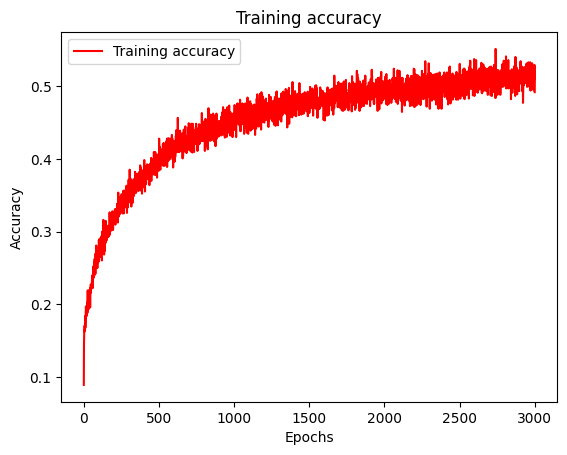

In [27]:
# Take the accuracies of the epochs 
accuracy = mc_classifier.history['accuracy']

# get the number of epochs run by the model
epochs = range(1, len(accuracy) + 1)

# plot the accuracies given by the trained model at every epoch
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [28]:
# Run the trained model against test data to predict the classes
y_pred = rating_model.predict(X_test).round()

# print the accuracy rate on test data
print(f"Accuracy of predicting test data: {round((rating_model.evaluate(X_test, y_test)[1])*100, 2)}%")

11/11 [==============================] - 0s 3ms/step - loss: 2.3087 - accuracy: 0.4235
Accuracy of predicting test data: 42.35%


#### Analysis of the result

For multi-class classification, the training and test accuracy has a greater difference which could be possible because of the size of our test samples. From the above graph, it is evident that the learning rate of the training model at every epoch is continuously increasing.